In [1]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

## #Extract Filenames from Folder

In [2]:

filenames = []
for file in os.listdir('dataset'):
    filenames.append(os.path.join('dataset',file))    # we are getting file name but we want path so we do jion and resulty wuld be dataset/1363.jpg
    

In [3]:
len(filenames)

2906

In [4]:
filenames[0]

'dataset\\10037.jpg'

## #Importing ResNet50 Model and Cofiguration

In [5]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False

model = tf.keras.models.Sequential([model,
                                   GlobalMaxPool2D()
                                   ])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 2048)                │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

## #Extracting Fetaures from Image

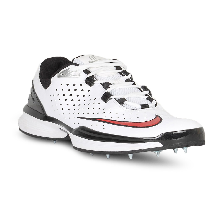

In [6]:
img = image.load_img('1636.jpg', target_size=(224,224))
img

In [7]:
img = image.load_img('1636.jpg', target_size=(224,224))
# img
img_array = image.img_to_array(img)

img_expand_dim = np.expand_dims(img_array, axis=0)
img_preprocess = preprocess_input(img_expand_dim)
result = model.predict(img_preprocess).flatten()
result.shape
norm_result = result/norm(result)
norm_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


array([0.00545683, 0.00539931, 0.00823116, ..., 0.01223024, 0.01469019,
       0.03253856], dtype=float32)

In [8]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [9]:
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


array([0.00577951, 0.        , 0.03458402, ..., 0.021275  , 0.02194786,
       0.0313978 ], dtype=float32)

In [10]:
# this is for one image , i need to do it for every image


In [11]:
image_features = []
for file in filenames :#[0:5]:
    image_features.append(extract_features_from_images(file, model))
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

[array([0.00577951, 0.        , 0.03458402, ..., 0.021275  , 0.02194786,
        0.0313978 ], dtype=float32),
 array([0.00176775, 0.00035145, 0.01130889, ..., 0.01632272, 0.00396379,
        0.01796067], dtype=float32),
 array([0.        , 0.13772932, 0.02822738, ..., 0.        , 0.02130919,
        0.0257484 ], dtype=float32),
 array([0.        , 0.00165882, 0.03194188, ..., 0.        , 0.00073753,
        0.00394469], dtype=float32),
 array([0.        , 0.        , 0.03812433, ..., 0.01022938, 0.00057816,
        0.00166576], dtype=float32),
 array([0.00699844, 0.        , 0.0237508 , ..., 0.        , 0.02001528,
        0.        ], dtype=float32),
 array([0.006574  , 0.00789878, 0.03964688, ..., 0.02003519, 0.02059023,
        0.00825369], dtype=float32),
 array([0.05043329, 0.        , 0.06080599, ..., 0.01834472, 0.01946617,
        0.00487432], dtype=float32),
 array([0.        , 0.00758633, 0.01296136, ..., 0.0016549 , 0.02997533,
        0.01809452], dtype=float32),
 array([0.

In [12]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [13]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

## Loading the model

In [14]:
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [15]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [16]:
np.array(Image_features).shape

(2906, 2048)

## Finding the similar images

In [17]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [18]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [20]:
input_image = extract_features_from_images('1636.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


In [22]:
distance,indices = neighbors.kneighbors([input_image])

In [23]:
indices[0]

array([ 262, 1889, 2560,   64,  556, 2611], dtype=int64)

In [24]:
from IPython.display import Image

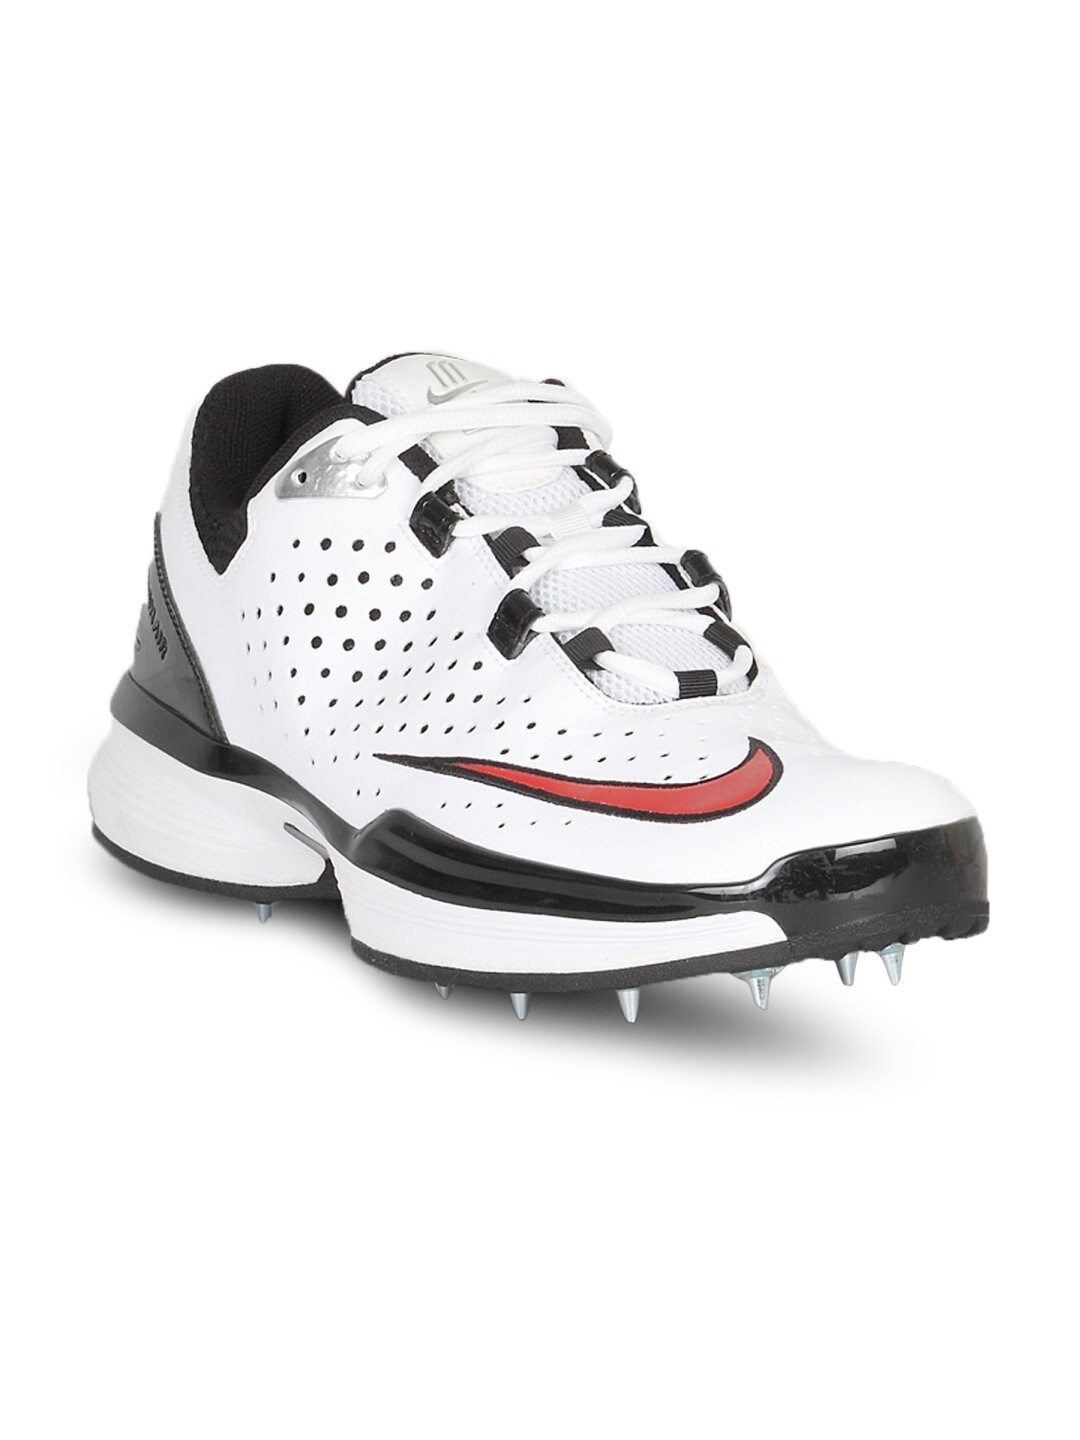

In [25]:
Image('1636.jpg')

In [26]:
filenames[indices[0][0]]

'dataset\\1636.jpg'

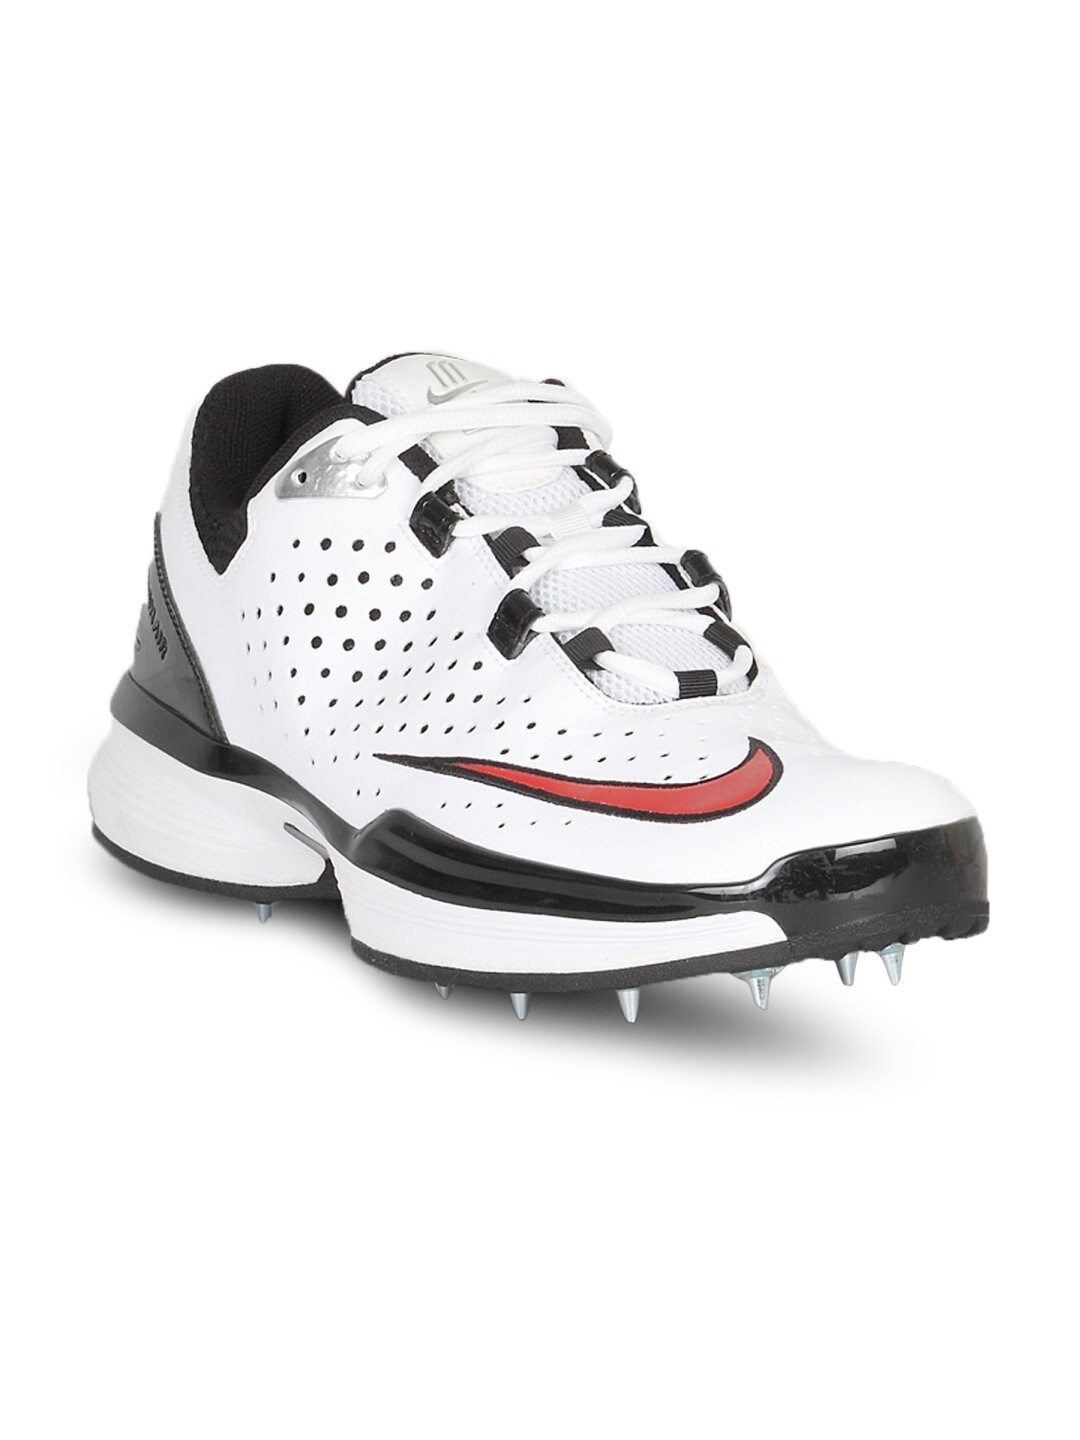

In [27]:
Image(filenames[indices[0][0]])  # self image 

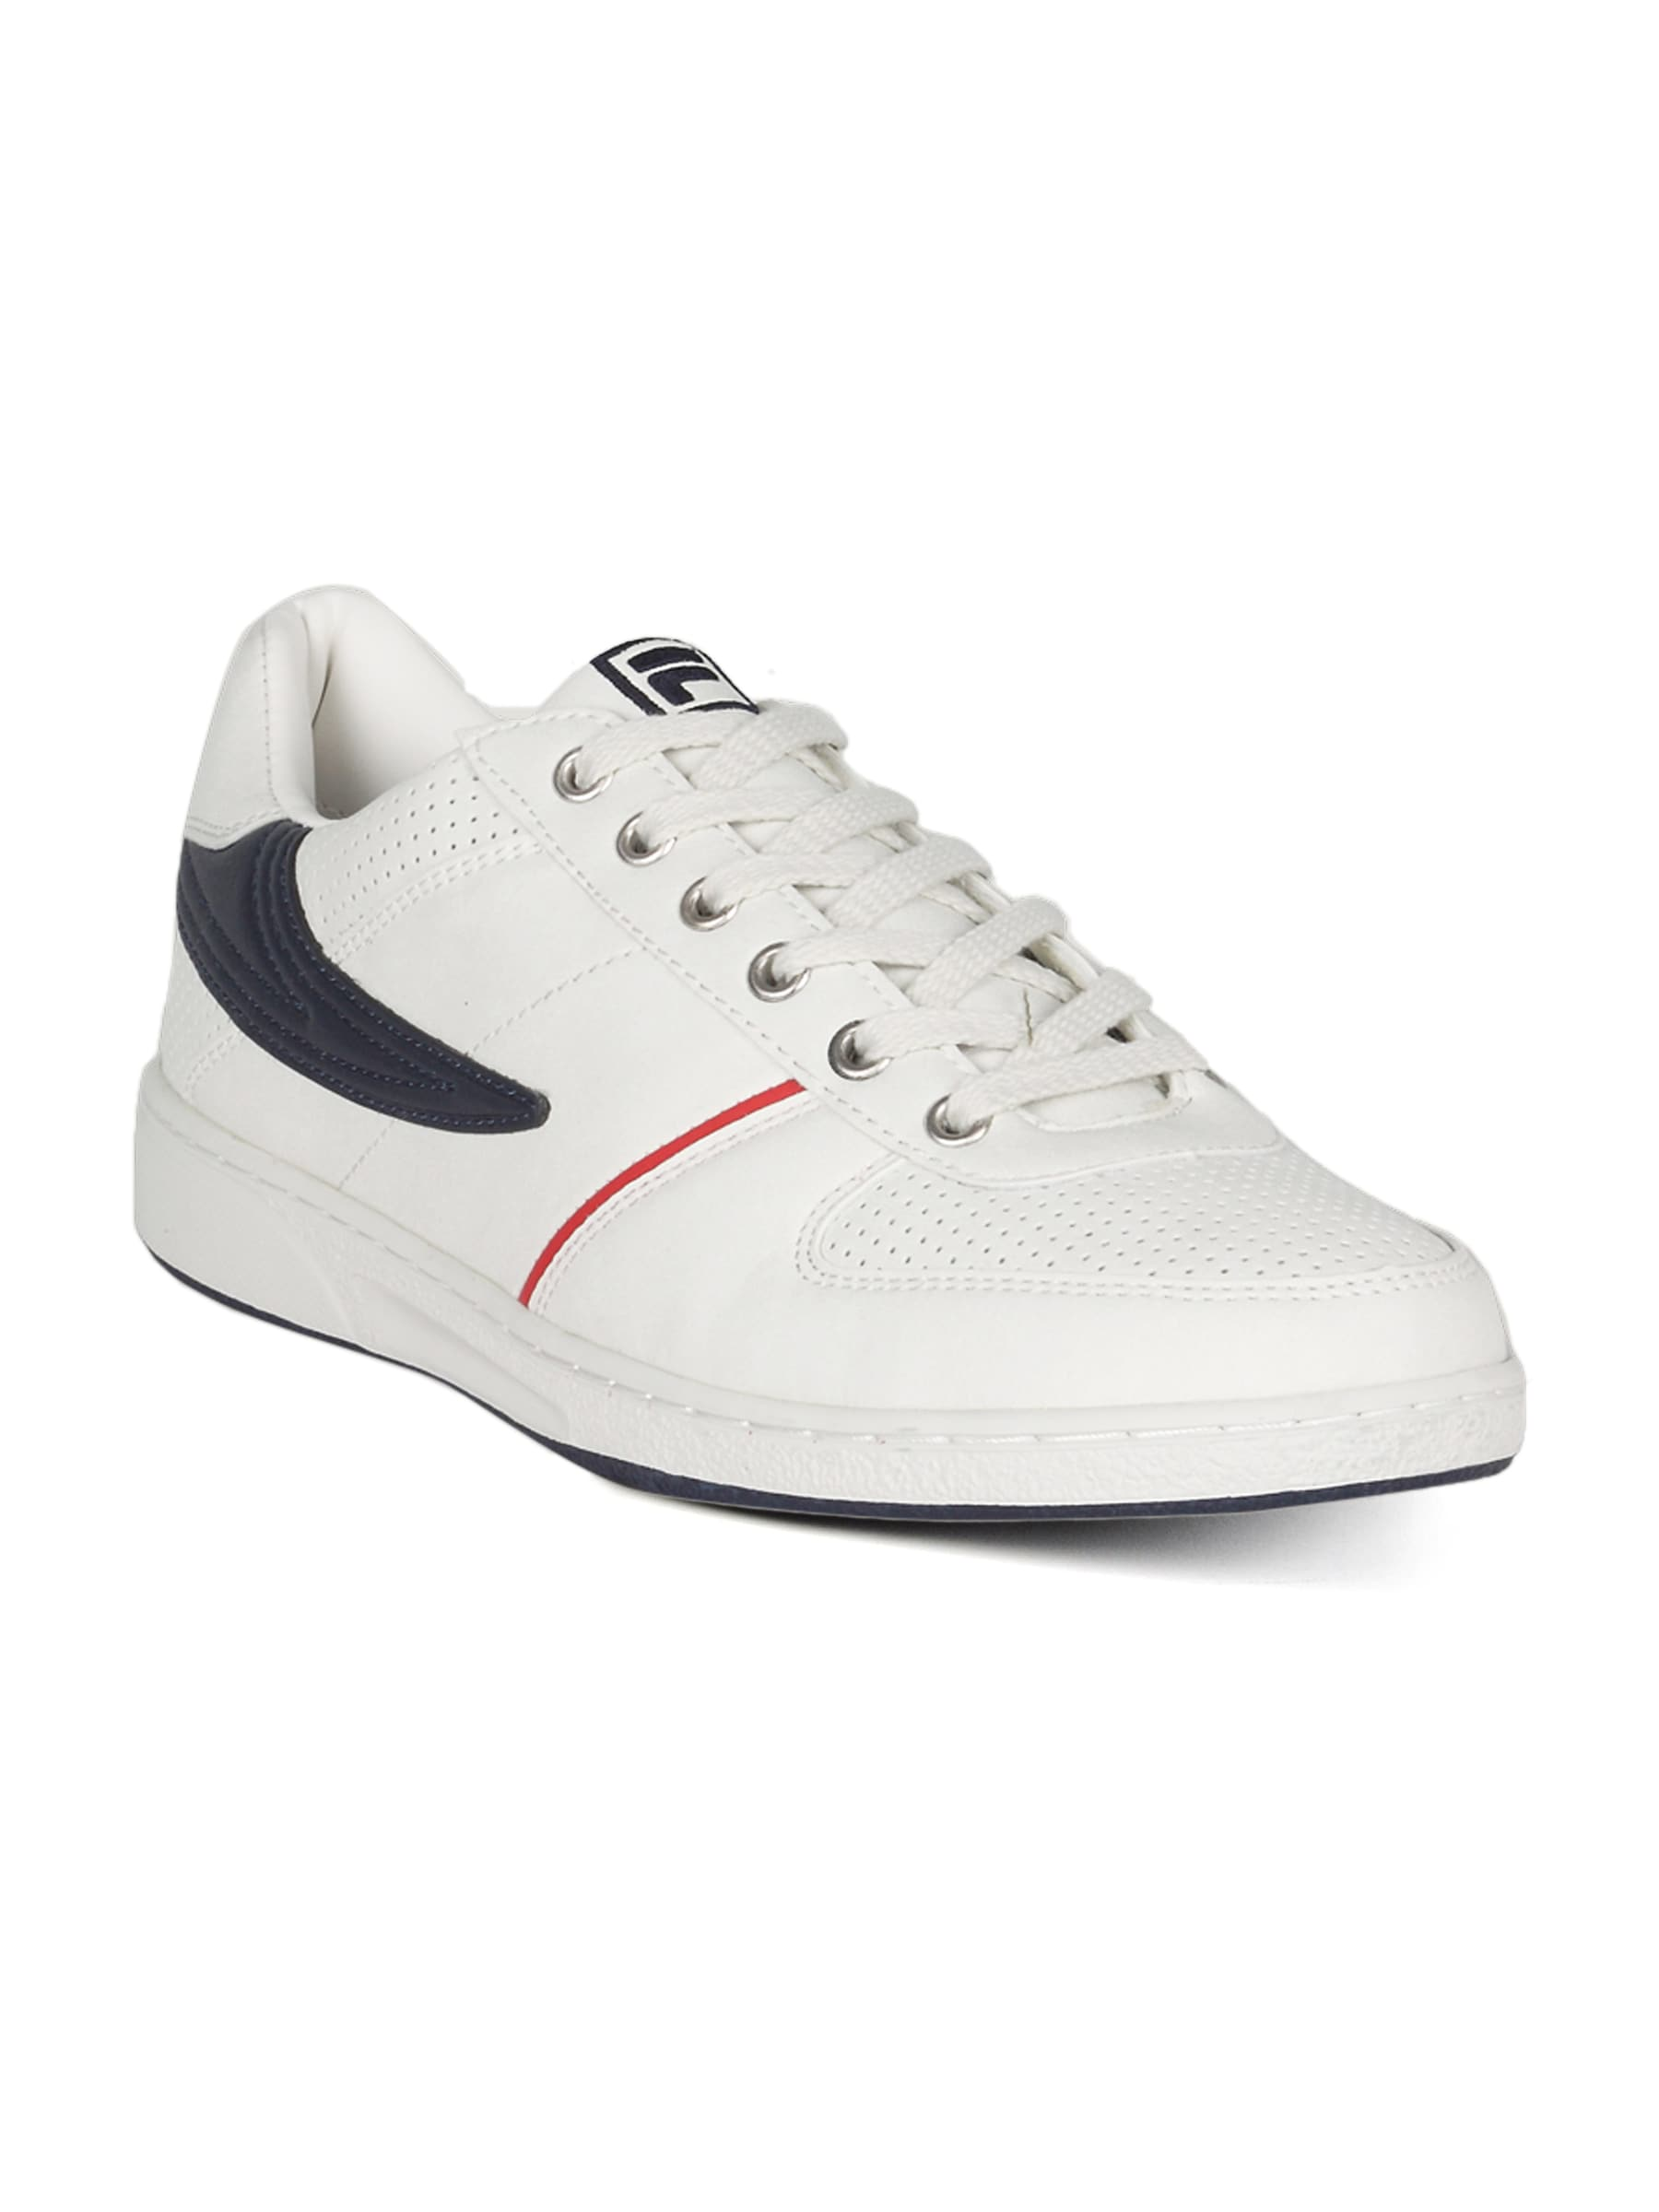

In [28]:
Image(filenames[indices[0][1]])

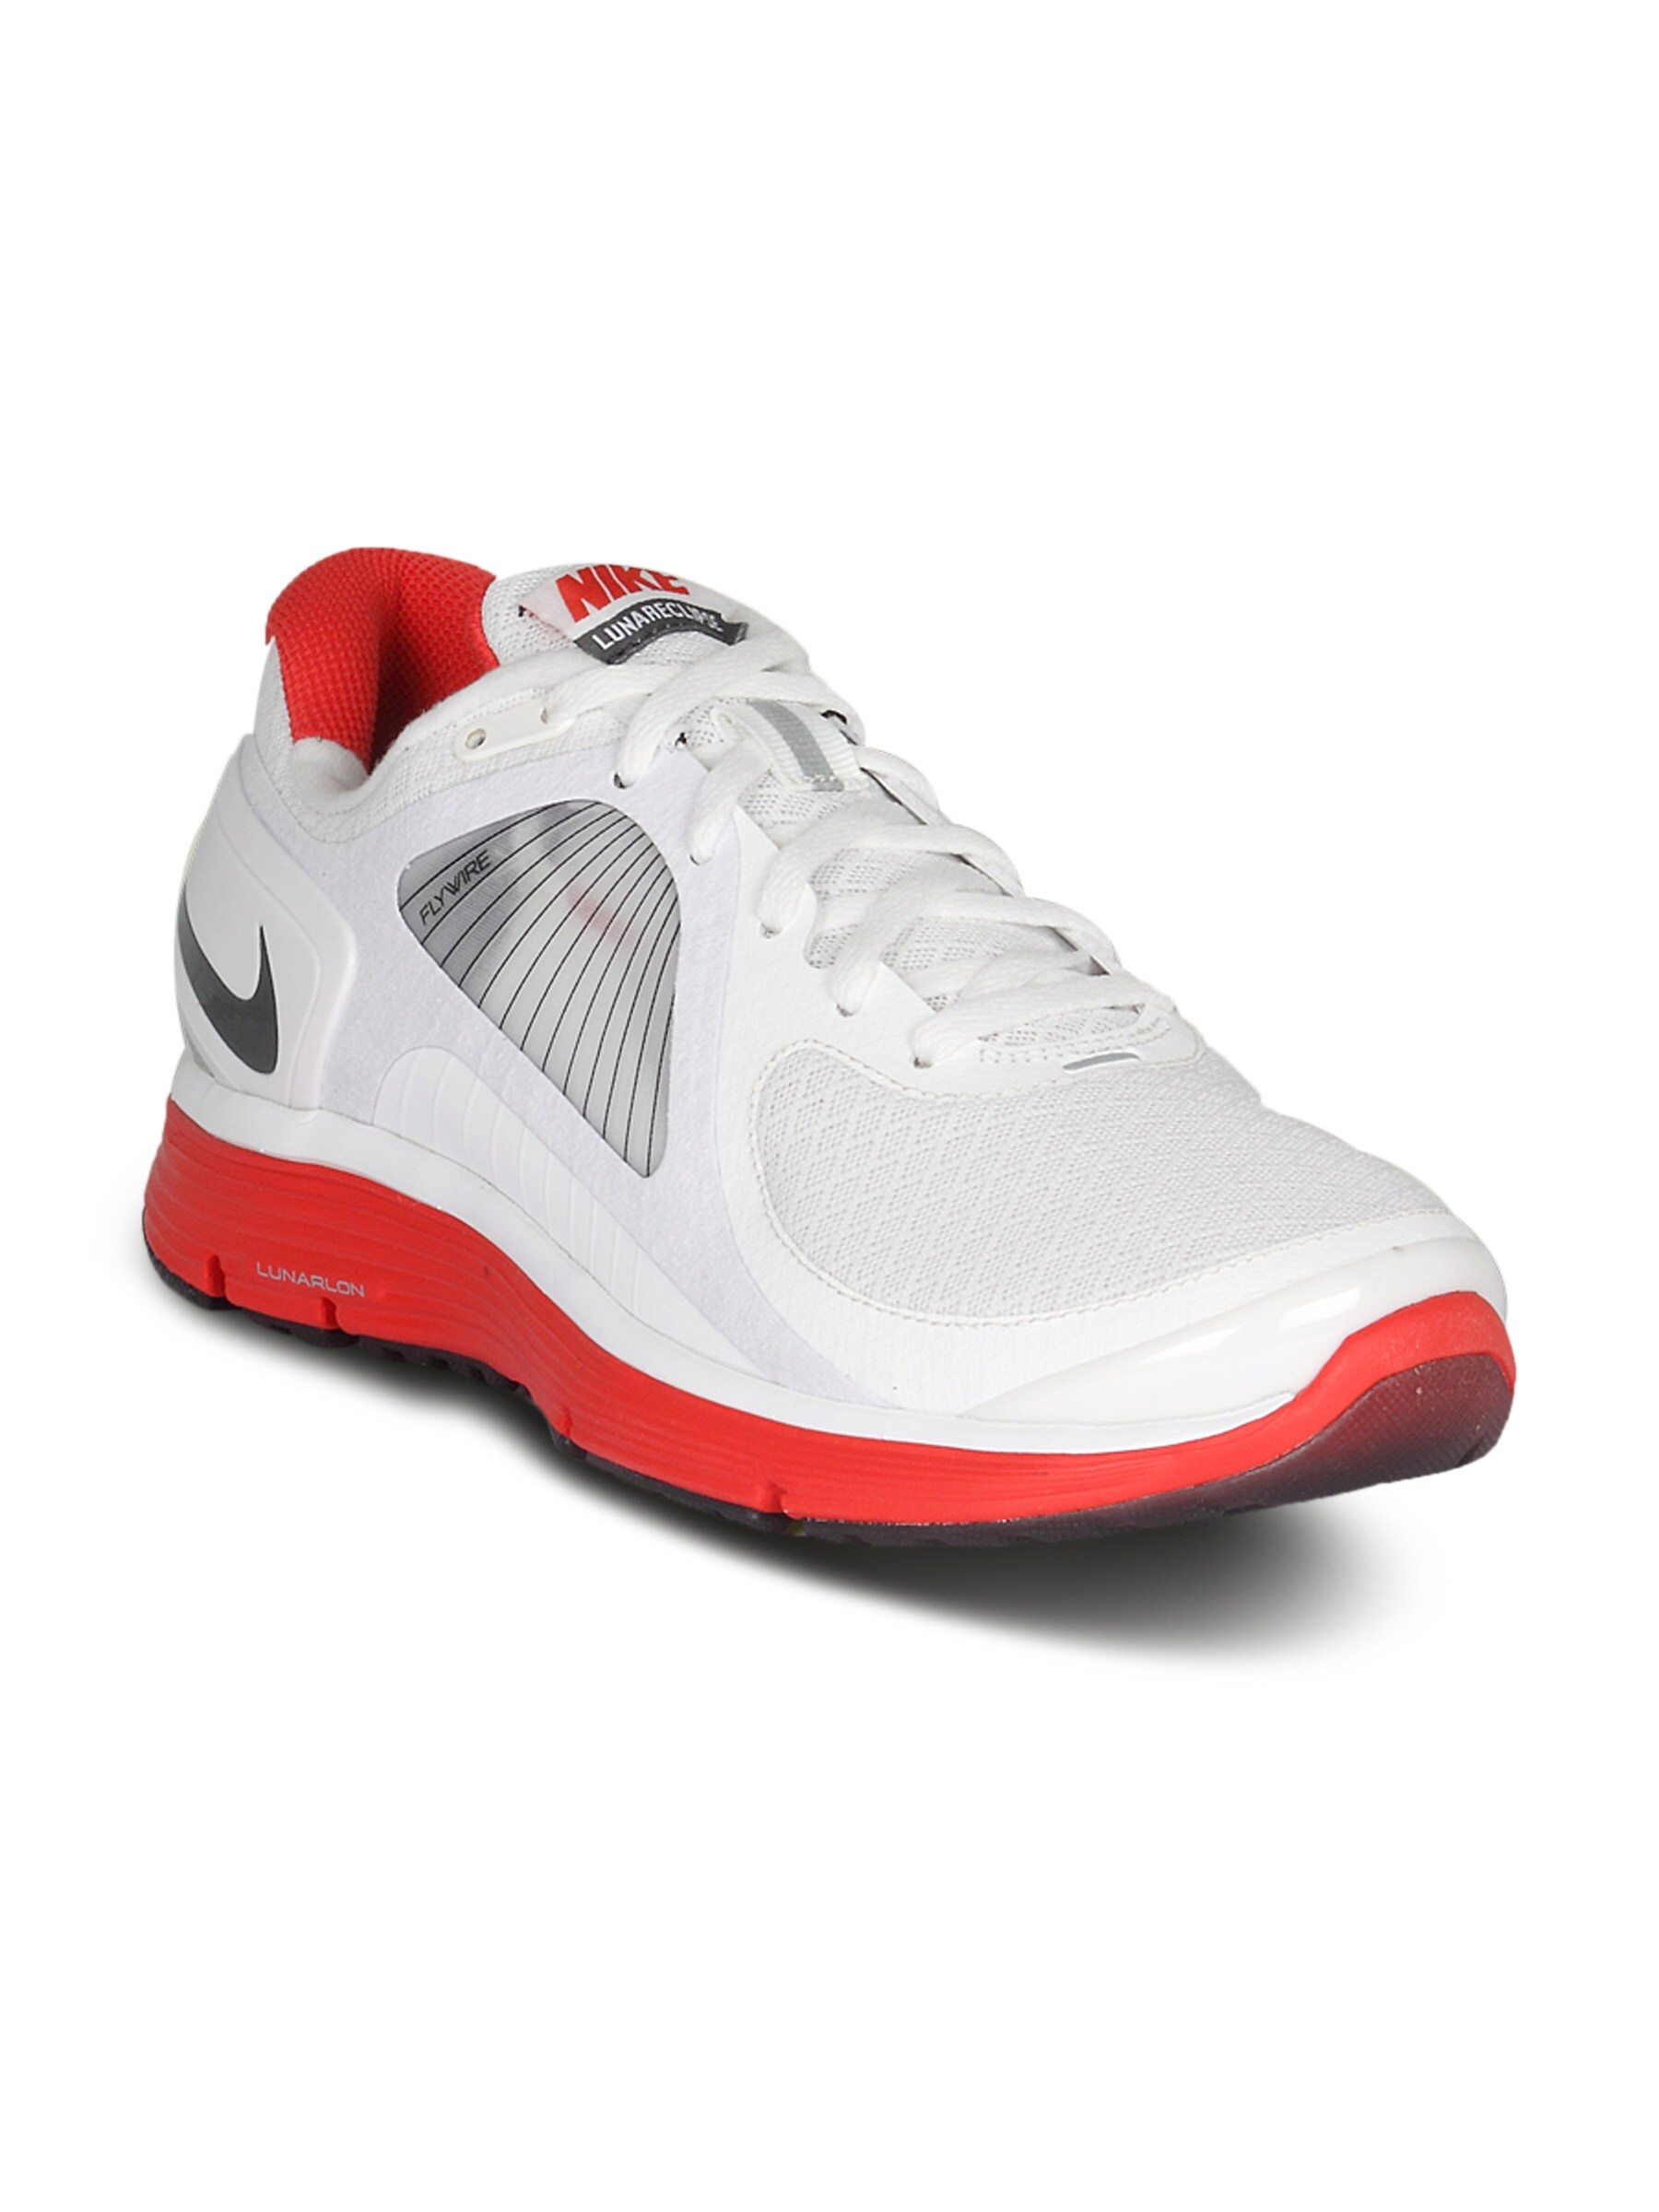

In [29]:
Image(filenames[indices[0][2]])

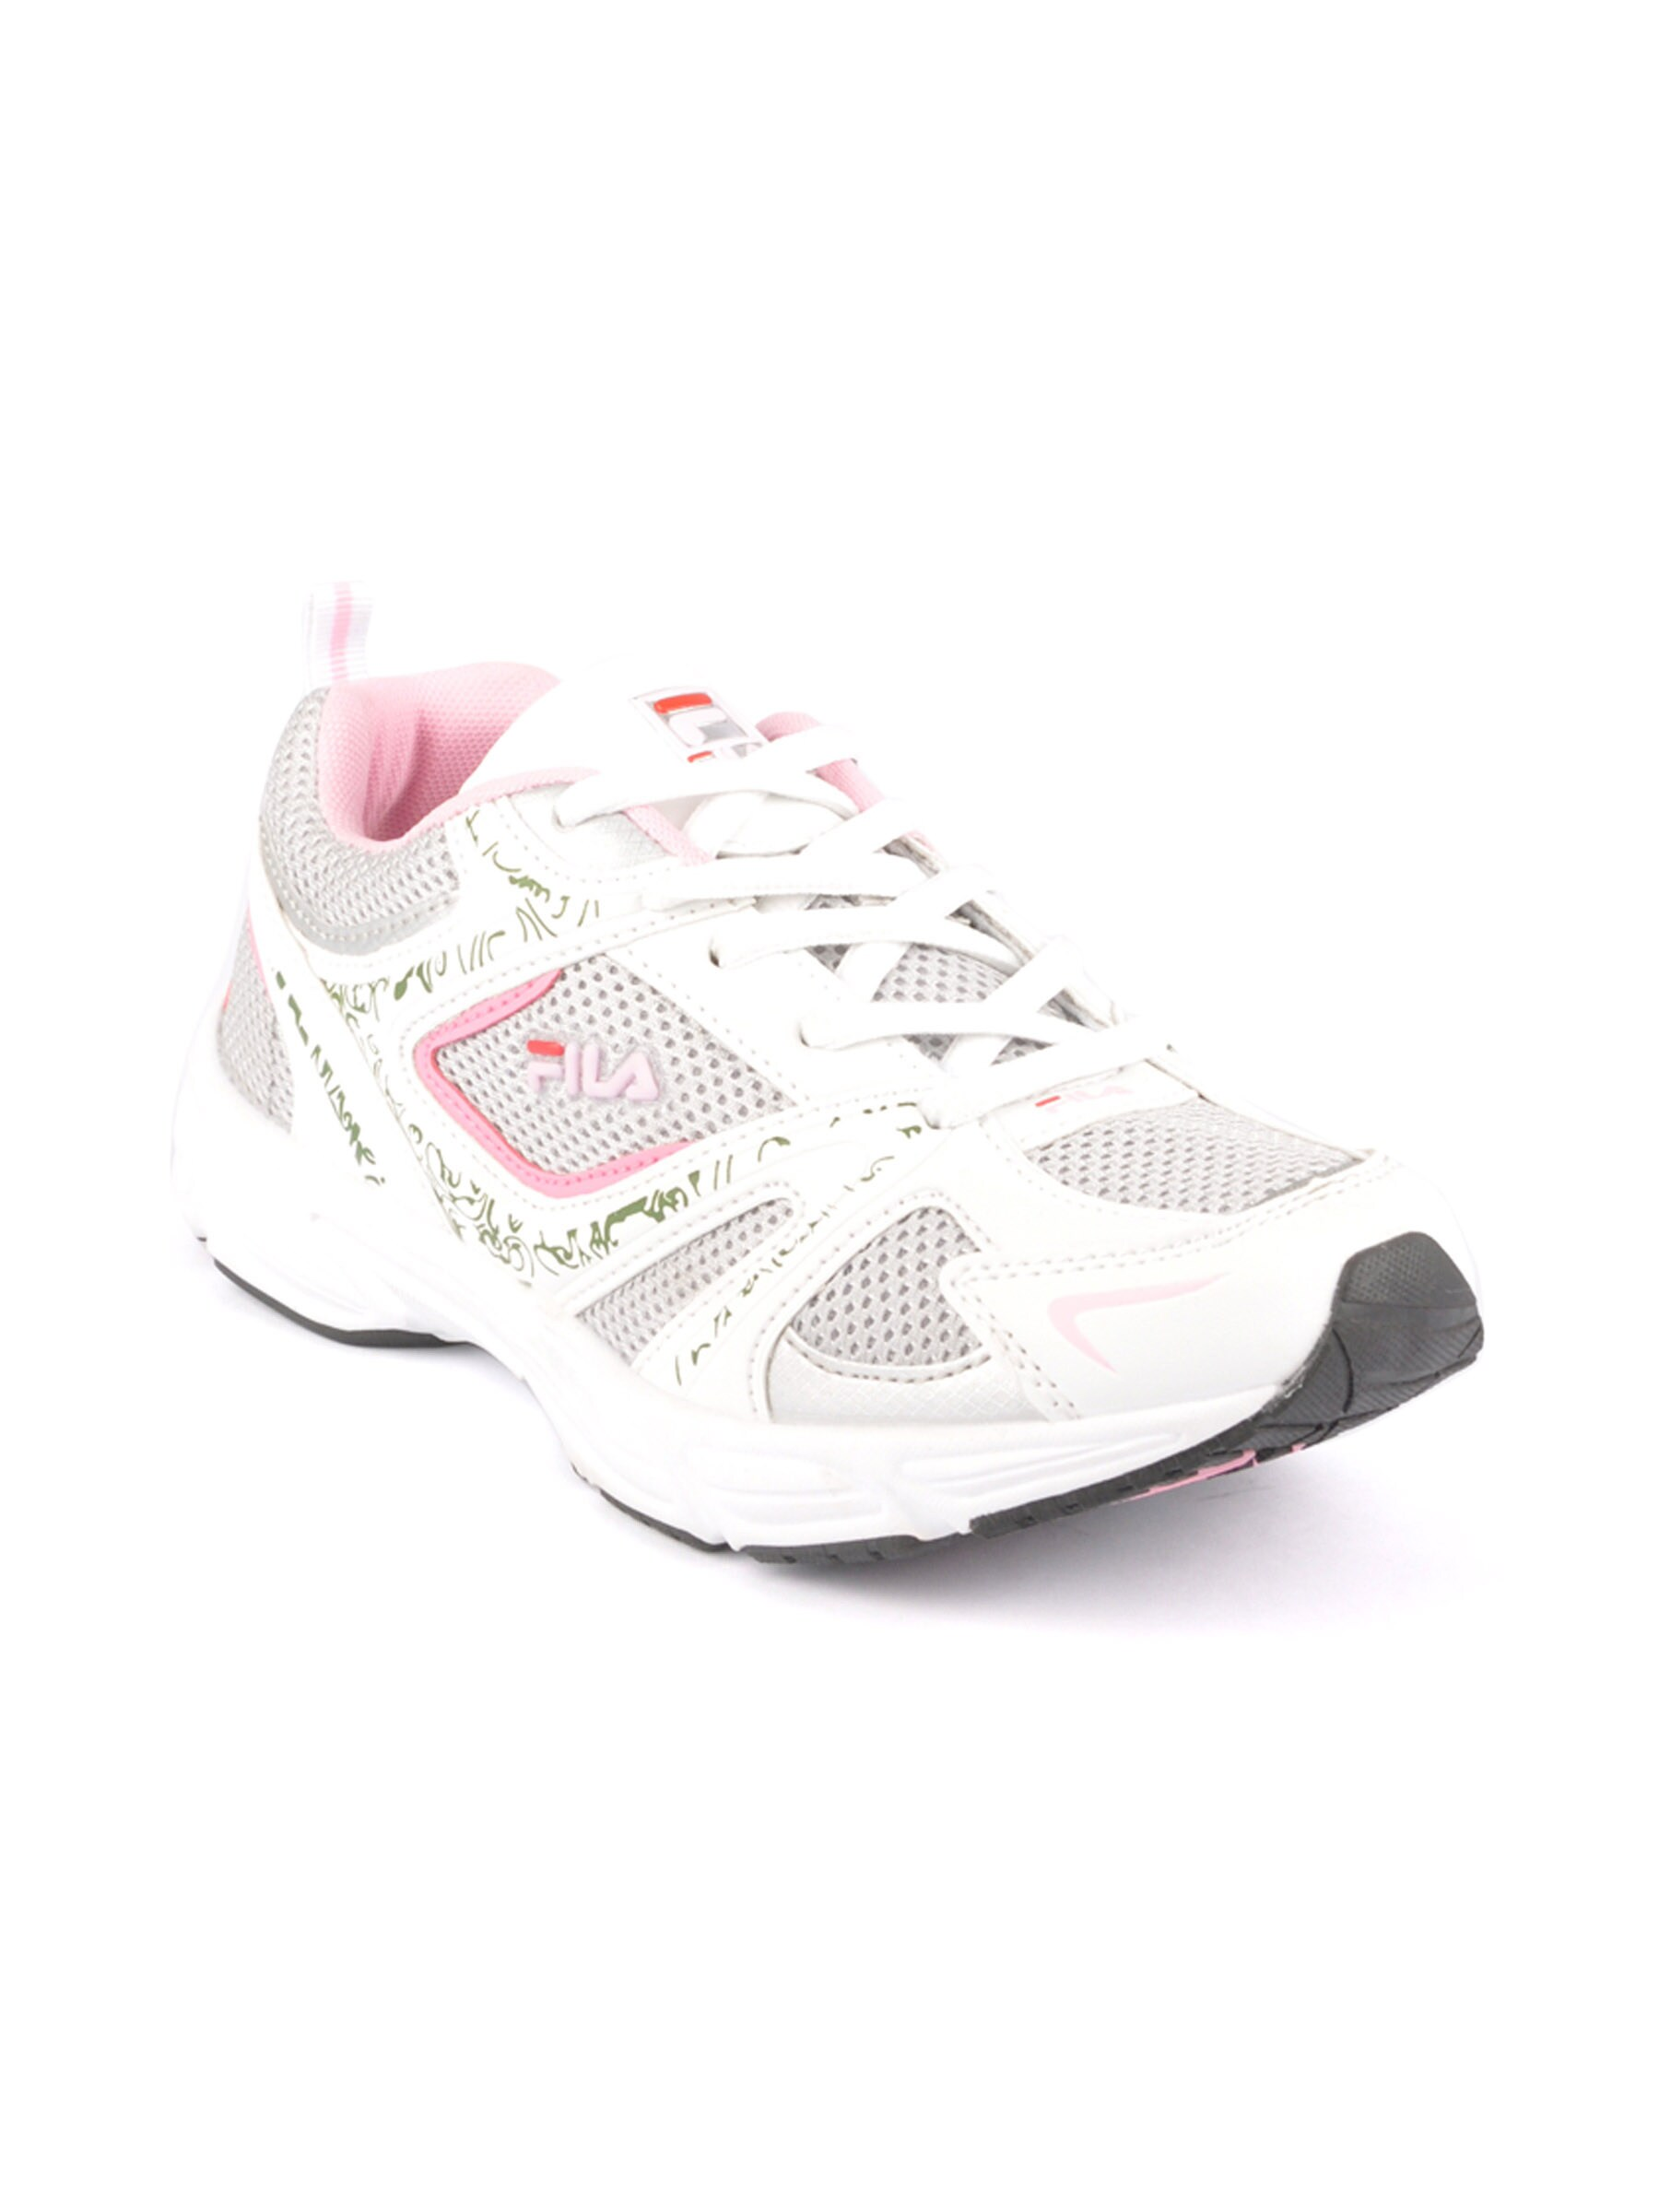

In [30]:
Image(filenames[indices[0][3]])